In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("spam.csv",encoding='latin', usecols = ['v1','v2'])
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.shape

(5572, 2)

In [4]:
df.isnull().sum().sort_values(ascending= False )

v2    0
v1    0
dtype: int64

Text(0.5, 1.0, 'Class Distributions Variable target ')

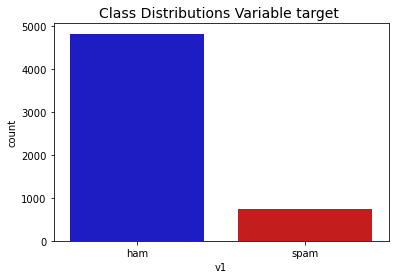

In [5]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('v1', data=df, palette=colors)
plt.title('Class Distributions Variable target ', fontsize=14)

In [6]:
# df['v1'].replace(['ham','spam'], [0,1], inplace = True)

In [7]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

# Pre-Processing

In [8]:
import string

def remove_punctuation(text):
    clean_text ="".join([i for i in text if i not in string.punctuation])
    return clean_text

In [9]:
df['v2'] = df['v2'].apply(lambda x:remove_punctuation(x))

In [10]:
df.head()

,v1,v2
0,ham,Go until jurong point crazy Available only in ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I dont think he goes to usf he lives aroun...


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 

In [13]:
vectorizer = CountVectorizer(lowercase=False) #convert text to numerical data
X = vectorizer.fit_transform(df['v2'])
vectorizer.vocabulary_

{'Go': 2096,
 'until': 10903,
 'jurong': 7676,
 'point': 9049,
 'crazy': 5884,
 'Available': 1144,
 'only': 8721,
 'in': 7453,
 'bugis': 5335,
 'great': 7053,
 'world': 11316,
 'la': 7787,
 'buffet': 5334,
 'Cine': 1520,
 'there': 10555,
 'got': 7022,
 'amore': 4762,
 'wat': 11107,
 'Ok': 3129,
 'lar': 7820,
 'Joking': 2500,
 'wif': 11222,
 'oni': 8716,
 'Free': 1978,
 'entry': 6449,
 'wkly': 11275,
 'comp': 5734,
 'to': 10661,
 'win': 11235,
 'FA': 1874,
 'Cup': 1588,
 'final': 6675,
 'tkts': 10654,
 '21st': 460,
 'May': 2852,
 '2005': 447,
 'Text': 4022,
 '87121': 887,
 'receive': 9382,
 'questionstd': 9290,
 'txt': 10828,
 'rateTCs': 9330,
 'apply': 4843,
 '08452810075over18s': 72,
 'dun': 6322,
 'say': 9685,
 'so': 10025,
 'early': 6341,
 'hor': 7309,
 'already': 4738,
 'then': 10551,
 'Nah': 3001,
 'dont': 6242,
 'think': 10573,
 'he': 7174,
 'goes': 6993,
 'usf': 10942,
 'lives': 7960,
 'around': 4890,
 'here': 7219,
 'though': 10592,
 'FreeMsg': 1980,
 'Hey': 2266,
 'darling': 5

In [14]:
count_data=pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names())
count_data["spam"]=df["v1"]
count_data.head()

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,ÛÏHarry,ÛÒ,ÛÓwell,åÈ10,åÐ,åÒHarry,åÒIts,åÔMORROW,åÔrents,spam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spam
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham


In [15]:
#TD IDF
vectorizer2 = TfidfVectorizer(lowercase=False)
Y = vectorizer2.fit_transform(df["v2"])
vectorizer2.vocabulary_

{'Go': 2096,
 'until': 10903,
 'jurong': 7676,
 'point': 9049,
 'crazy': 5884,
 'Available': 1144,
 'only': 8721,
 'in': 7453,
 'bugis': 5335,
 'great': 7053,
 'world': 11316,
 'la': 7787,
 'buffet': 5334,
 'Cine': 1520,
 'there': 10555,
 'got': 7022,
 'amore': 4762,
 'wat': 11107,
 'Ok': 3129,
 'lar': 7820,
 'Joking': 2500,
 'wif': 11222,
 'oni': 8716,
 'Free': 1978,
 'entry': 6449,
 'wkly': 11275,
 'comp': 5734,
 'to': 10661,
 'win': 11235,
 'FA': 1874,
 'Cup': 1588,
 'final': 6675,
 'tkts': 10654,
 '21st': 460,
 'May': 2852,
 '2005': 447,
 'Text': 4022,
 '87121': 887,
 'receive': 9382,
 'questionstd': 9290,
 'txt': 10828,
 'rateTCs': 9330,
 'apply': 4843,
 '08452810075over18s': 72,
 'dun': 6322,
 'say': 9685,
 'so': 10025,
 'early': 6341,
 'hor': 7309,
 'already': 4738,
 'then': 10551,
 'Nah': 3001,
 'dont': 6242,
 'think': 10573,
 'he': 7174,
 'goes': 6993,
 'usf': 10942,
 'lives': 7960,
 'around': 4890,
 'here': 7219,
 'though': 10592,
 'FreeMsg': 1980,
 'Hey': 2266,
 'darling': 5

In [16]:
TF_data=pd.DataFrame(data=Y.toarray(), columns=vectorizer2.get_feature_names())
TF_data["spam"]=df["v1"]
TF_data.head()

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,ÛÏHarry,ÛÒ,ÛÓwell,åÈ10,åÐ,åÒHarry,åÒIts,åÔMORROW,åÔrents,spam
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spam
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham


In [17]:
TF_data.sum()

008704050406                                             0.501275
0089my                                                   0.245129
0121                                                     0.323113
01223585236                                              0.276944
01223585334                                              0.432578
                                      ...                        
åÒHarry                                                  0.276961
åÒIts                                                    0.285737
åÔMORROW                                                  0.20435
åÔrents                                                  0.232124
spam            hamhamspamhamhamspamhamhamspamspamhamspamspamh...
Length: 11527, dtype: object

In [19]:
from sklearn.model_selection import train_test_split

# SPLIT DATA

In [71]:
y=df["v1"]
x=df["v2"]
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state=42) #train our email spam detector to recognize and categorize spam emails

In [72]:
y1=count_data["spam"]
x1=count_data.drop("spam",axis=1)
x_trainC, x_testC, y_trainC, y_testC = train_test_split(x1,y1,test_size = 0.1, random_state=42) #train our email spam detector to recognize and categorize spam emails

In [73]:
y2=TF_data["spam"]
x2=TF_data.drop("spam",axis=1)
x_trainTF, x_testTF, y_trainTF, y_testTF = train_test_split(x2, y2, test_size=0.1, random_state=42)

# SVM Model 
SVM, the support vector machine algorithm, is a linear model for classification and regression. The idea of SVM is simple, the algorithm creates a line, or a hyperplane, which separates the data into classes. SVM can solve both linear and non-linear problems

In [74]:
from sklearn import svm

In [75]:
features = vectorizer.fit_transform(x_train) # randomly assigns a number to each word and counts the number of occurrences of words and saves it to cv
features_test = vectorizer.transform(x_test) #makes predictions from x_test that will go through count vectorization. It saves the results to the features_test file.

In [76]:
# create an SVM model 
model = svm.SVC()
model.fit(features,y_train) #trains the model with features and y_train

SVC()

In [77]:
print(model.score(features_test,y_test))

0.982078853046595


# Naive Bayes 

In [78]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

In [79]:
clf = MultinomialNB()
clf.fit(x_trainC, y_trainC)
y_bayes=clf.predict(x_testC)

In [80]:
print(clf.score(x_testC, y_testC))
confusion_matrix(y_testC, y_bayes)

0.9623655913978495


array([[473,  18],
       [  3,  64]], dtype=int64)

# TF Naive Bayes

In [81]:
clf.fit(x_trainTF, y_trainTF)
y_bayesTF=clf.predict(x_testTF)

In [82]:
print(clf.score(x_testTF, y_testTF))
confusion_matrix(y_test, y_bayesTF)

0.9659498207885304


array([[490,   1],
       [ 18,  49]], dtype=int64)

# Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
clf = RandomForestClassifier(n_estimators=500, criterion='entropy')
clf=clf.fit(x_trainC, y_trainC)
y_tree=clf.predict(x_testC)

In [85]:
print(clf.score(x_testC, y_testC))
confusion_matrix(y_testC, y_tree)

0.974910394265233


array([[491,   0],
       [ 14,  53]], dtype=int64)

# TF Random Forest

In [86]:
clf=clf.fit(x_trainTF, y_trainTF)
y_treeTF=clf.predict(x_testTF)

In [87]:
print(clf.score(x_testTF, y_testTF))
confusion_matrix(y_testTF, y_treeTF)

0.9767025089605734


array([[491,   0],
       [ 13,  54]], dtype=int64)

# Logitic regression

In [88]:
from sklearn.linear_model import LogisticRegression

In [91]:
log = LogisticRegression(random_state=0).fit(x_trainC, y_trainC)
y_log = log.predict(x_testC)
log.predict_proba(x_trainC)

array([[0.13515848, 0.86484152],
       [0.99781157, 0.00218843],
       [0.98940815, 0.01059185],
       ...,
       [0.99384499, 0.00615501],
       [0.99047969, 0.00952031],
       [0.97369301, 0.02630699]])

In [94]:
print(log.score(x_testC, y_testC))
confusion_matrix(y_testC, y_log)

0.985663082437276


array([[491,   0],
       [  8,  59]], dtype=int64)

# TF Logitic regression 

In [95]:
log = LogisticRegression(random_state=0).fit(x_trainTF, y_trainTF)
y_logTF = log.predict(x_testTF)
log.predict_proba(x_trainTF)

array([[0.7247231 , 0.2752769 ],
       [0.97571266, 0.02428734],
       [0.95362388, 0.04637612],
       ...,
       [0.94320166, 0.05679834],
       [0.93096978, 0.06903022],
       [0.92980279, 0.07019721]])

In [96]:
print(log.score(x_testTF, y_testTF))
confusion_matrix(y_testTF, y_logTF)

0.967741935483871


array([[491,   0],
       [ 18,  49]], dtype=int64)

# Conclusion

In [107]:
data={'Vectorizer':['count','TF IDF'],
    'Naive Bayes':[0.9695340501792115,0.978494623655914],
    'Random Forest ':[0.982078853046595,0.9838709677419355],
    'Logistic Regression ':[0.9874551971326165,0.9731182795698925]
}
acc_df = pd.DataFrame(data)

In [108]:
acc_df.set_index('Vectorizer',inplace=True)

In [109]:
acc_df

,Naive Bayes,Random Forest,Logistic Regression
Vectorizer,,,
count,0.969534,0.982079,0.987455
TF IDF,0.978495,0.983871,0.973118


# DecisionTreeClassifier, LogisticRegression, Naive_bayes with KFold

In [99]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split,cross_validate

#spliting data into train/test
kf = KFold(n_splits=5, shuffle=True, random_state=10)
tree_scores   = {'accuracy_scores':[],'precision_scores':[],'recall_scores':[]}
random_scores = {'accuracy_scores':[],'precision_scores':[],'recall_scores':[]}
navies_scores = {'accuracy_scores':[],'precision_scores':[],'recall_scores':[]}

In [106]:
#making the models
for train_indexes, test_indexes in kf.split(x,y):    
    
    clf=clf.fit(x_trainTF, y_trainTF)
    y_treeTF=clf.predict(x_testTF)
    random_scores['accuracy_scores'].append(clf.score(x_testTF, y_testTF)
    random_prediction = clf.predict(x_testTF)
    random_scores['precision_scores'].append(precision_score(y_testTF,random_prediction))
    random_scores['recall_scores'].append(recall_score(y_testTF,random_prediction)) 
    
    
    navies = GaussianNB()
    navies.fit(features, y_train)
    navies_scores['accuracy_scores'].append(navies.score(features_test,y_test))
    navies_prediction = random.predict(features_test)
    navies_scores['precision_scores'].append(precision_score(y_test,navies_prediction))
    navies_scores['recall_scores'].append(recall_score(y_test,navies_prediction))

print("naive_bayes Gaussian")
print("  accuracy:", np.mean(navies_scores['accuracy_scores']))
print("  precision:", np.mean(navies_scores['precision_scores']))
print("  recall:", np.mean(navies_scores['recall_scores']))
                                                 
                                            
print("Random Forest")
print("  accuracy:", np.mean(random_scores['accuracy_scores']))
print("  precision:", np.mean(random_scores['precision_scores']))
print("  recall:", np.mean(random_scores['recall_scores']))

      


SyntaxError: unexpected EOF while parsing (<ipython-input-106-3a6293ed2133>, line 7)